In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import rcParams
import seaborn as sns

rcParams["figure.figsize"] = 18, 6


In [2]:
df = pd.read_csv("data/stocks_info.csv")

In [3]:
df.head()

,Date,Close PETR4,Volume PETR4,Close ITUB4,Volume ITUB4,Close VALE3,Volume VALE3,Close BBAS3,Volume BBAS3,Close BBSE3,Volume BBSE3,Close B3SA3,Volume B3SA3,Close SAPR11,Volume SAPR11,SELIC,IPCA,Cambio
0,2017-01-02,4.408222,7525700,17.967449,3415665,13.994313,1118500,8.390503,3936400,13.871104,1035100,4.121328,8419500,NaN,NaN,0.1375,0.05354,3.2723
1,2017-01-03,4.660809,39947800,18.728361,27736500,14.614174,5658500,8.774381,15157800,14.364719,3355900,4.290942,43704600,NaN,NaN,0.1375,0.05354,3.2626
2,2017-01-04,4.660809,37071700,18.808744,14981175,14.351711,2144400,8.728682,8312600,14.818450,6728900,4.371952,28232400,NaN,NaN,0.1375,0.05354,3.2327
3,2017-01-05,4.735984,47586300,19.065948,24187680,14.898976,4031600,8.707357,10914200,14.519288,3386300,4.318788,35297700,NaN,NaN,0.1375,0.05354,3.2123
4,2017-01-06,4.708920,25592000,19.130255,15419415,14.502488,4213500,8.801803,7384800,14.294913,1998400,4.316258,37683300,NaN,NaN,0.1375,0.05354,3.2051


In [5]:
df["Date"] = pd.to_datetime(df["Date"])
df.index = df["Date"]
df.drop("Date", axis=1, inplace=True)
df.head()

,Close PETR4,Volume PETR4,Close ITUB4,Volume ITUB4,Close VALE3,Volume VALE3,Close BBAS3,Volume BBAS3,Close BBSE3,Volume BBSE3,Close B3SA3,Volume B3SA3,Close SAPR11,Volume SAPR11,SELIC,IPCA,Cambio
Date,,,,,,,,,,,,,,,,,
2017-01-02,4.408222,7525700,17.967449,3415665,13.994313,1118500,8.390503,3936400,13.871104,1035100,4.121328,8419500,NaN,NaN,0.1375,0.05354,3.2723
2017-01-03,4.660809,39947800,18.728361,27736500,14.614174,5658500,8.774381,15157800,14.364719,3355900,4.290942,43704600,NaN,NaN,0.1375,0.05354,3.2626
2017-01-04,4.660809,37071700,18.808744,14981175,14.351711,2144400,8.728682,8312600,14.818450,6728900,4.371952,28232400,NaN,NaN,0.1375,0.05354,3.2327
2017-01-05,4.735984,47586300,19.065948,24187680,14.898976,4031600,8.707357,10914200,14.519288,3386300,4.318788,35297700,NaN,NaN,0.1375,0.05354,3.2123
2017-01-06,4.708920,25592000,19.130255,15419415,14.502488,4213500,8.801803,7384800,14.294913,1998400,4.316258,37683300,NaN,NaN,0.1375,0.05354,3.2051


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1992 entries, 2017-01-02 to 2024-12-30
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Close PETR4    1992 non-null   float64
 1   Volume PETR4   1992 non-null   int64  
 2   Close ITUB4    1992 non-null   float64
 3   Volume ITUB4   1992 non-null   int64  
 4   Close VALE3    1992 non-null   float64
 5   Volume VALE3   1992 non-null   int64  
 6   Close BBAS3    1992 non-null   float64
 7   Volume BBAS3   1992 non-null   int64  
 8   Close BBSE3    1992 non-null   float64
 9   Volume BBSE3   1992 non-null   int64  
 10  Close B3SA3    1992 non-null   float64
 11  Volume B3SA3   1992 non-null   int64  
 12  Close SAPR11   1742 non-null   float64
 13  Volume SAPR11  1742 non-null   float64
 14  SELIC          1986 non-null   float64
 15  IPCA           1992 non-null   float64
 16  Cambio         1986 non-null   float64
dtypes: float64(11), int64(6)
memory us

In [7]:
stocks_list = ["PETR4", "ITUB4", "VALE3", "BBAS3", "BBSE3", "B3SA3", "SAPR11"]

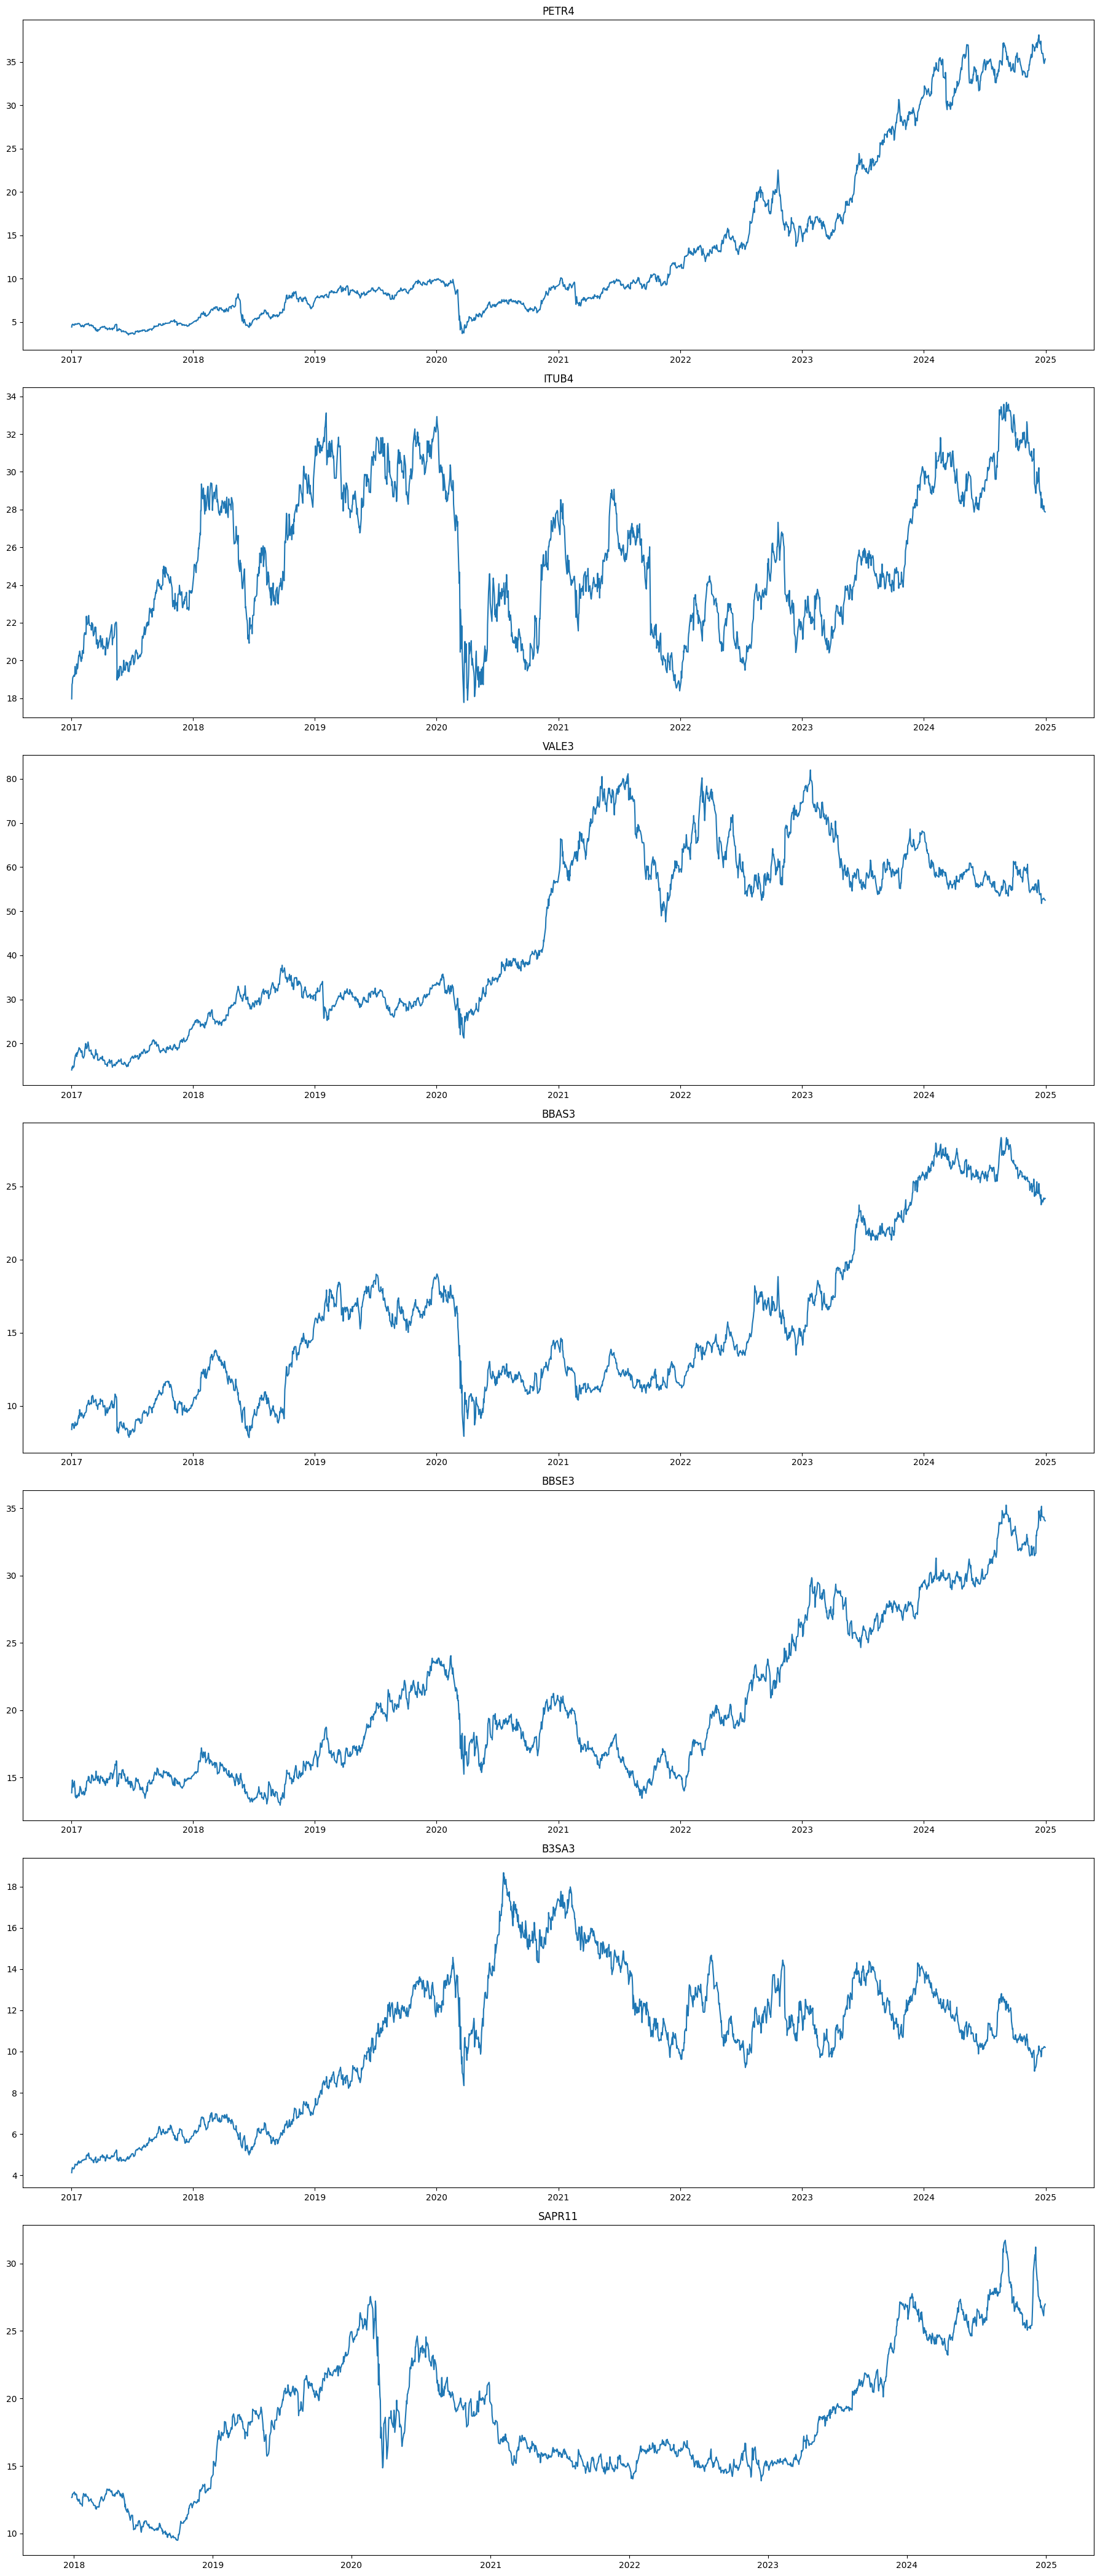

In [8]:
graphic_height = 6
fig, axs = plt.subplots(len(stocks_list), figsize=(18, graphic_height * len(stocks_list)))

for i, stock in enumerate(stocks_list):
    axs[i].plot(df[f"Close {stock}"])
    axs[i].set_title(f"{stock}")

plt.tight_layout()
plt.show()

In [9]:
df_2021 = df.loc[df.index.year >= 2021]
df_2024 = df.loc[df.index.year >= 2024]

<Axes: >

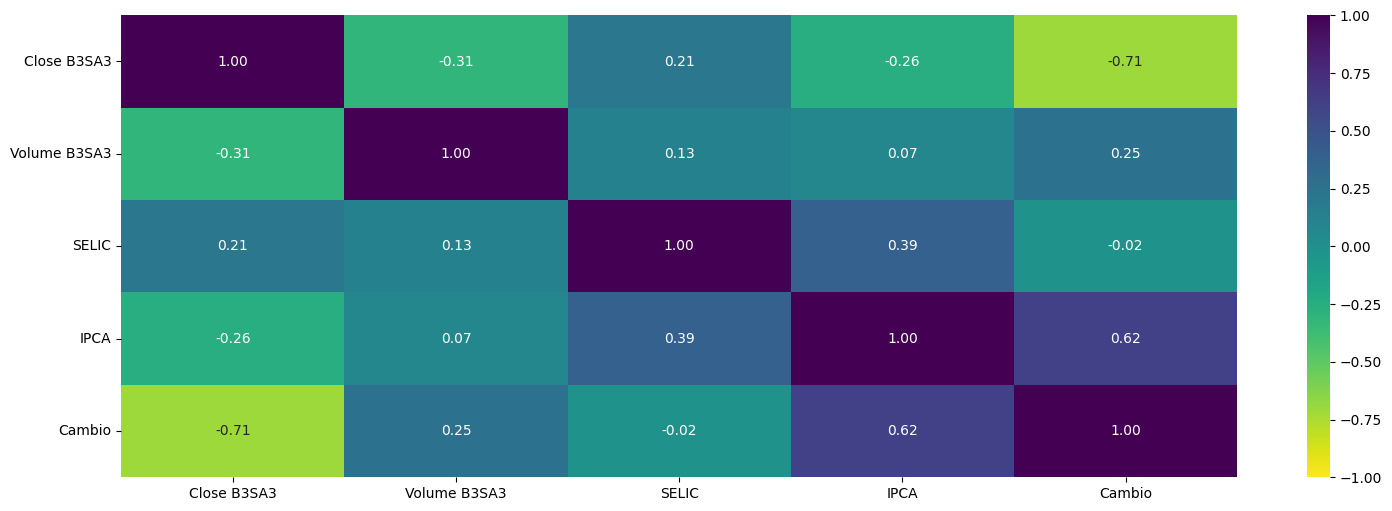

In [10]:
sns.heatmap(df_2024[["Close B3SA3", "Volume B3SA3", "SELIC", "IPCA", "Cambio"]].corr(), vmin=-1, vmax=1, cmap="viridis_r", annot=True, fmt='.2f')

In [11]:
df_bbas = df[["Close BBAS3", "Volume BBAS3", "SELIC", "IPCA", "Cambio"]]

In [14]:
bb_series = pd.Series(df["Close BBAS3"])
bb_series

Date
2017-01-02     8.390503
2017-01-03     8.774381
2017-01-04     8.728682
2017-01-05     8.707357
2017-01-06     8.801803
                ...    
2024-12-20    24.080000
2024-12-23    23.920000
2024-12-26    24.200001
2024-12-27    24.110001
2024-12-30    24.170000
Name: Close BBAS3, Length: 1992, dtype: float64

In [ ]:
# Criando Features -> Lags
df_bbas["Lag 1"] = df["Close BBAS3"].shift(1)
df_bbas["Lag 3"] = df["Close BBAS3"].shift(3)
df_bbas["Lag 5"] = df["Close BBAS3"].shift(5)

C:\Users\felip\AppData\Local\Temp\ipykernel_10228\1755268414.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_bbas["Lag 1"] = df["Close BBAS3"].shift(1)
C:\Users\felip\AppData\Local\Temp\ipykernel_10228\1755268414.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_bbas["Lag 3"] = df["Close BBAS3"].shift(3)
C:\Users\felip\AppData\Local\Temp\ipykernel_10228\1755268414.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_inde

In [15]:
# Criando Features -> Médias móveis
df_bbas["ma_10d"] = bb_series.rolling(window=10).mean()
df_bbas["ma_20d"] = bb_series.rolling(window=20).mean()
df_bbas.head(20)

C:\Users\felip\AppData\Local\Temp\ipykernel_10228\491626608.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_bbas["ma_10d"] = bb_series.rolling(window=10).mean()
C:\Users\felip\AppData\Local\Temp\ipykernel_10228\491626608.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_bbas["ma_20d"] = bb_series.rolling(window=20).mean()


,Close BBAS3,Volume BBAS3,SELIC,IPCA,Cambio,Lag 1,Lag 3,Lag 5,ma_10d,ma_20d
Date,,,,,,,,,,
2017-01-02,8.390503,3936400,0.1375,0.05354,3.2723,NaN,NaN,NaN,NaN,NaN
2017-01-03,8.774381,15157800,0.1375,0.05354,3.2626,8.390503,NaN,NaN,NaN,NaN
2017-01-04,8.728682,8312600,0.1375,0.05354,3.2327,8.774381,NaN,NaN,NaN,NaN
2017-01-05,8.707357,10914200,0.1375,0.05354,3.2123,8.728682,8.390503,NaN,NaN,NaN
2017-01-06,8.801803,7384800,0.1375,0.05354,3.2051,8.707357,8.774381,NaN,NaN,NaN
2017-01-09,8.469719,30980400,0.1375,0.05354,3.2091,8.801803,8.728682,8.390503,NaN,NaN
2017-01-10,8.585491,10895200,0.1375,0.05354,3.1912,8.469719,8.707357,8.774381,NaN,NaN
2017-01-11,8.676892,11368400,0.1375,0.05354,3.2148,8.585491,8.801803,8.728682,NaN,NaN
2017-01-12,8.896250,18930200,0.1300,0.05354,3.1655,8.676892,8.469719,8.707357,NaN,NaN


In [16]:
# Decomposição da série Temporal em seus componentes (Tendência, Sazonal e Resíduos)
from statsmodels.tsa.seasonal import seasonal_decompose

# decompa = seasonal_decompose(bb_series, model="additive", period=5)  # Método aditivo
decompa = seasonal_decompose(bb_series, model="multiplicative", period=5) # Método multiplicativo

print(decompa.trend)
print(decompa.seasonal)
print(decompa.resid)

Date
2017-01-02          NaN
2017-01-03          NaN
2017-01-04     8.680545
2017-01-05     8.696388
2017-01-06     8.658610
                ...    
2024-12-20    23.966000
2024-12-23    24.040000
2024-12-26    24.096000
2024-12-27          NaN
2024-12-30          NaN
Name: trend, Length: 1992, dtype: float64
Date
2017-01-02    1.000188
2017-01-03    1.000400
2017-01-04    0.999785
2017-01-05    0.999483
2017-01-06    1.000143
                ...   
2024-12-20    0.999785
2024-12-23    0.999483
2024-12-26    1.000143
2024-12-27    1.000188
2024-12-30    1.000400
Name: seasonal, Length: 1992, dtype: float64
Date
2017-01-02         NaN
2017-01-03         NaN
2017-01-04    1.005761
2017-01-05    1.001779
2017-01-06    1.016392
                ...   
2024-12-20    1.004973
2024-12-23    0.995523
2024-12-26    1.004172
2024-12-27         NaN
2024-12-30         NaN
Name: resid, Length: 1992, dtype: float64


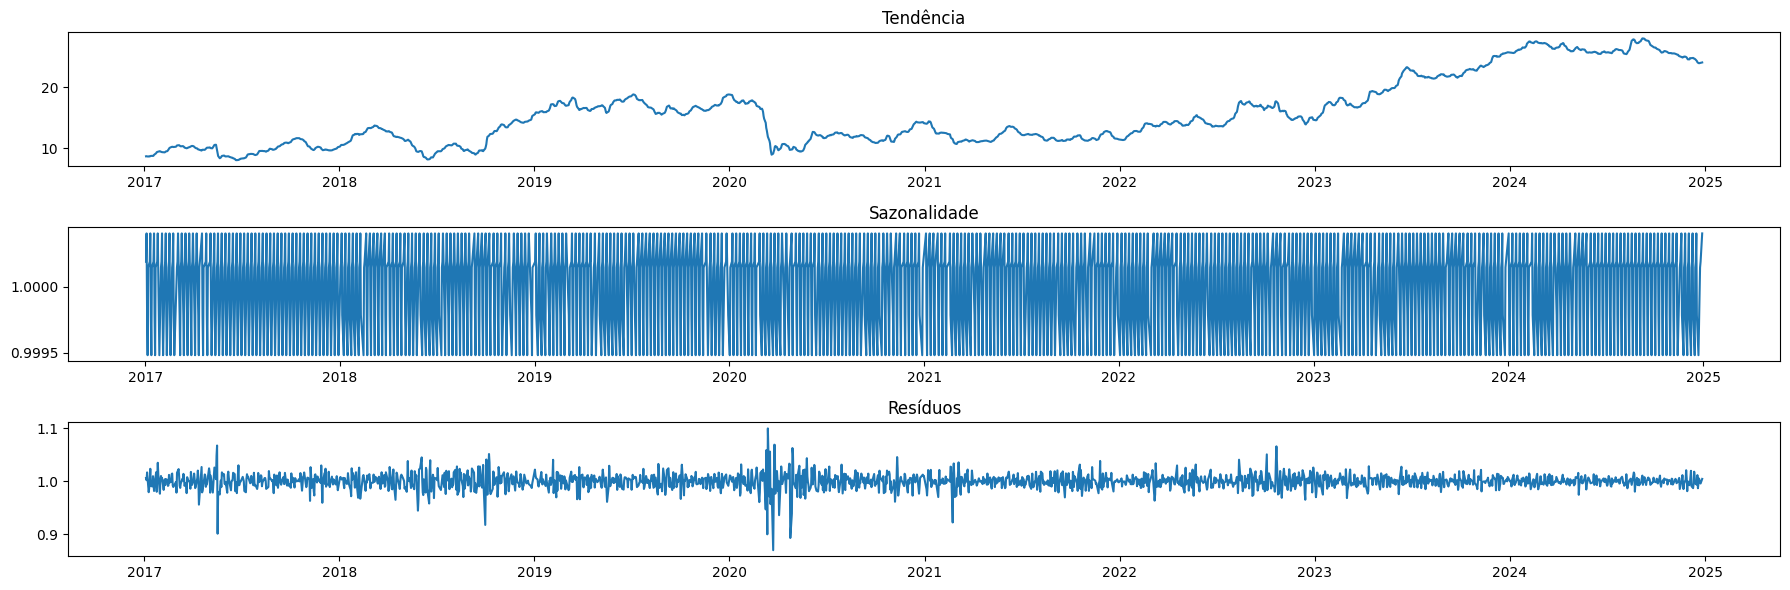

In [17]:
# Plotando as séries

plt.subplot(3, 1, 1)
plt.plot(decompa.trend)
plt.title("Tendência")

plt.subplot(3, 1, 2)
plt.plot(decompa.seasonal)
plt.title("Sazonalidade")

plt.subplot(3, 1, 3)
plt.plot(decompa.resid)
plt.title("Resíduos")

plt.tight_layout()
plt.show()

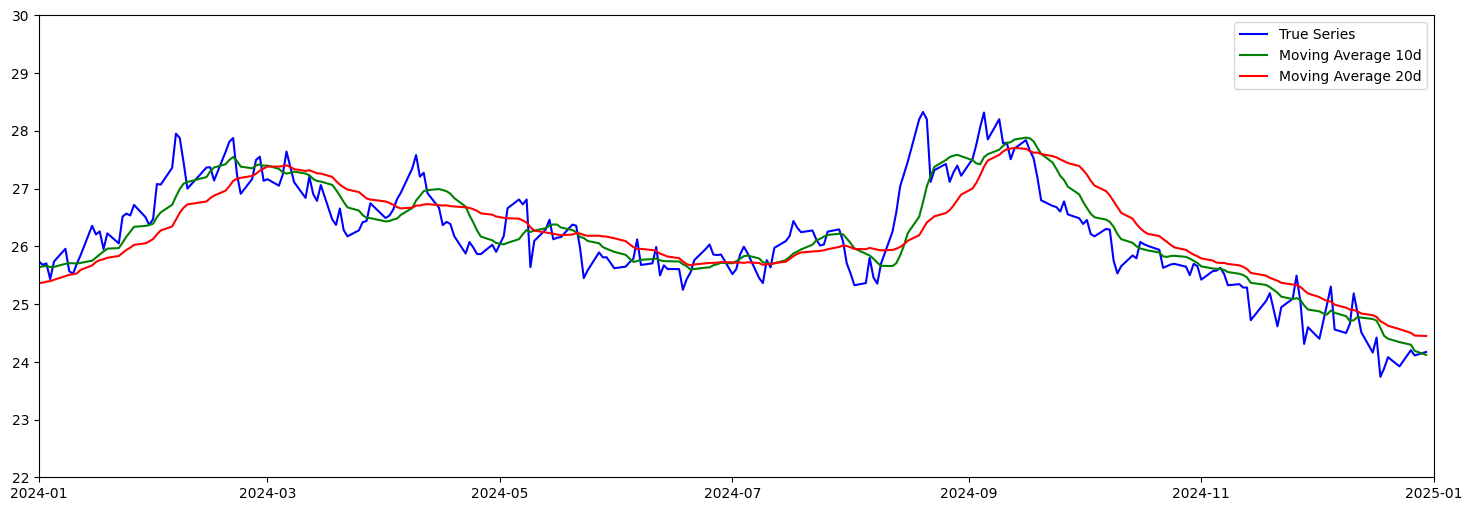

In [18]:
plt.plot(bb_series, 'blue')
plt.plot(df_bbas["ma_10d"], 'green')
plt.plot(df_bbas["ma_20d"], 'red')
plt.legend(["True Series", "Moving Average 10d", "Moving Average 20d"])
plt.ylim([22, 30])
plt.xlim([pd.Timestamp("2024-01-01"), pd.Timestamp("2025-01-01")])
plt.show()

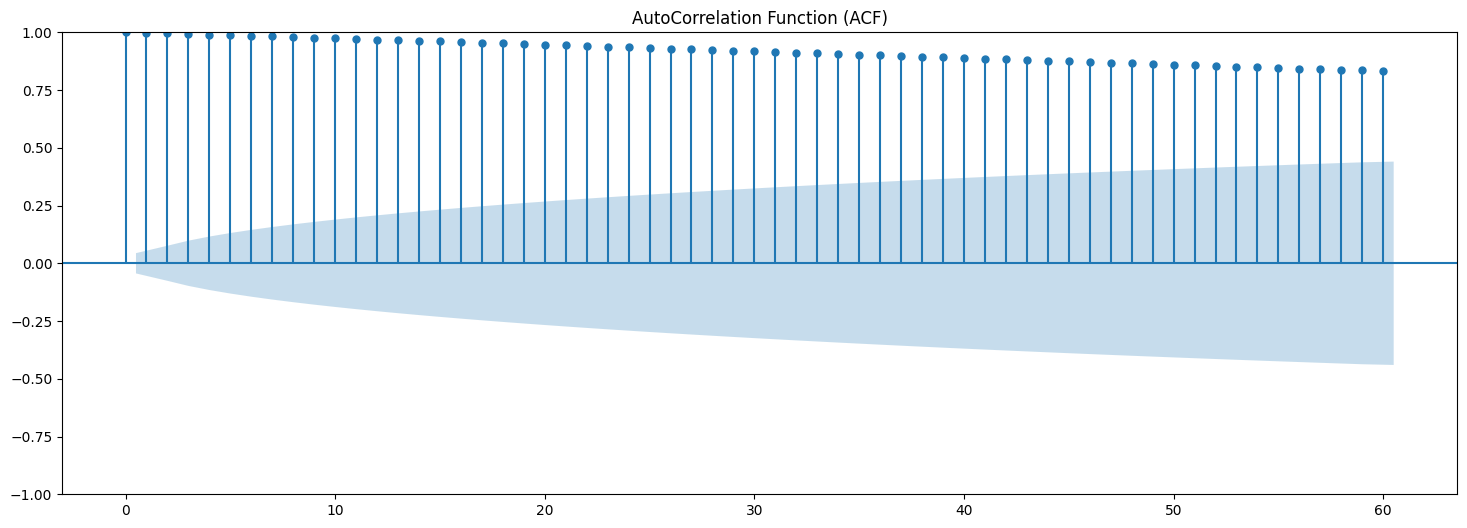

In [19]:
# ACF (AutoCorrelation Function)
from statsmodels.graphics.tsaplots import plot_acf

plot_acf(bb_series, lags=60)
plt.title("AutoCorrelation Function (ACF)")
plt.show()

ACF Decai lentamente -> Indica não estacionariedade


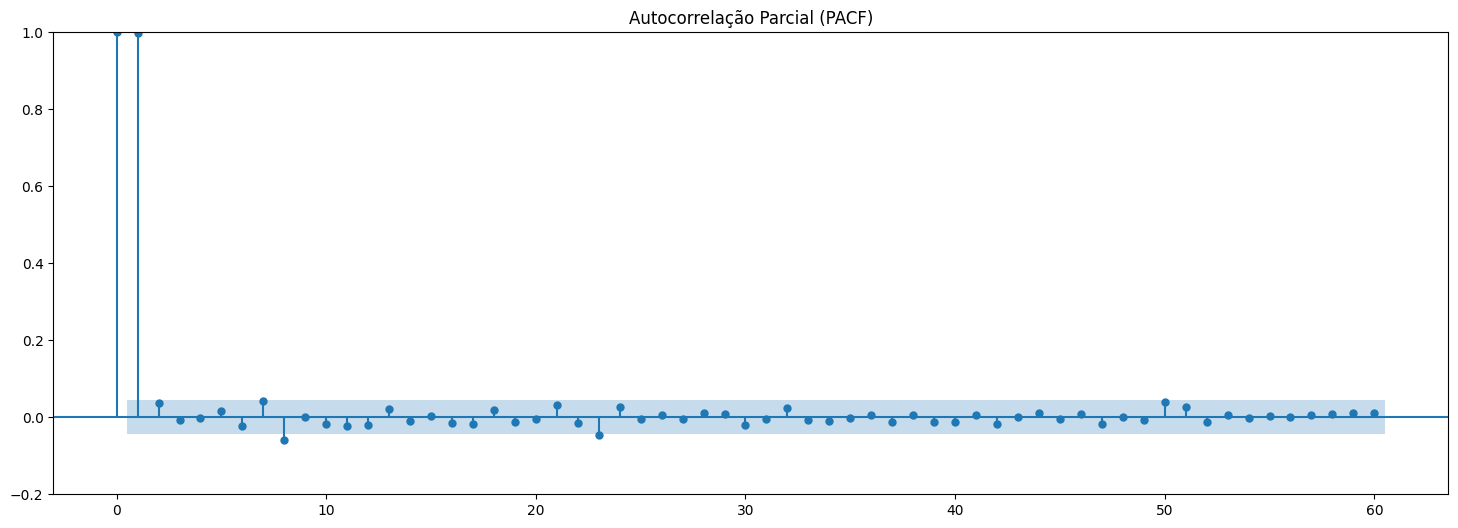

In [23]:
from statsmodels.graphics.tsaplots import plot_pacf
import matplotlib.pyplot as plt

# Suponha que sua série já seja estacionária
plot_pacf(bb_series, lags=60, method='ywm')  # 'ywm' = método robusto
plt.title('Autocorrelação Parcial (PACF)')
plt.ylim([-0.2, 1])
plt.show()

Pico significativo em Lag 1, típico de uma série que precisa de diferenciação. Vamos fazer o teste de estacionariedade (Augmented Dickey-Fuller test)

In [25]:
from statsmodels.tsa.stattools import adfuller

resultado_adf =  adfuller(bb_series)
adf_stat = resultado_adf[0]
p_value = resultado_adf[1]
print(p_value)

0.7245974910149602


- H0 = p-value < 0.05 -> Série Estacionária
- H1 = p-value > 0.05 -> Série não é estacionária e deve ser diferenciada.

Como o p-valor foi de 0.72 rejeita-se H0 e portanto a série não é estacionária e deve ser diferenciada.

In [26]:
bb_series_diff = bb_series.diff().dropna()

In [27]:
resultado_adf = adfuller(bb_series_diff)
print(f'ADF Statistic: {resultado_adf[0]}')
print(f'p-value: {resultado_adf[1]}')

ADF Statistic: -16.46285164575041
p-value: 2.3214277516695973e-29


Agora sim! p-valor é bem menor que 0.05 e portanto-se não rejeita H0 -> Série Estacionária

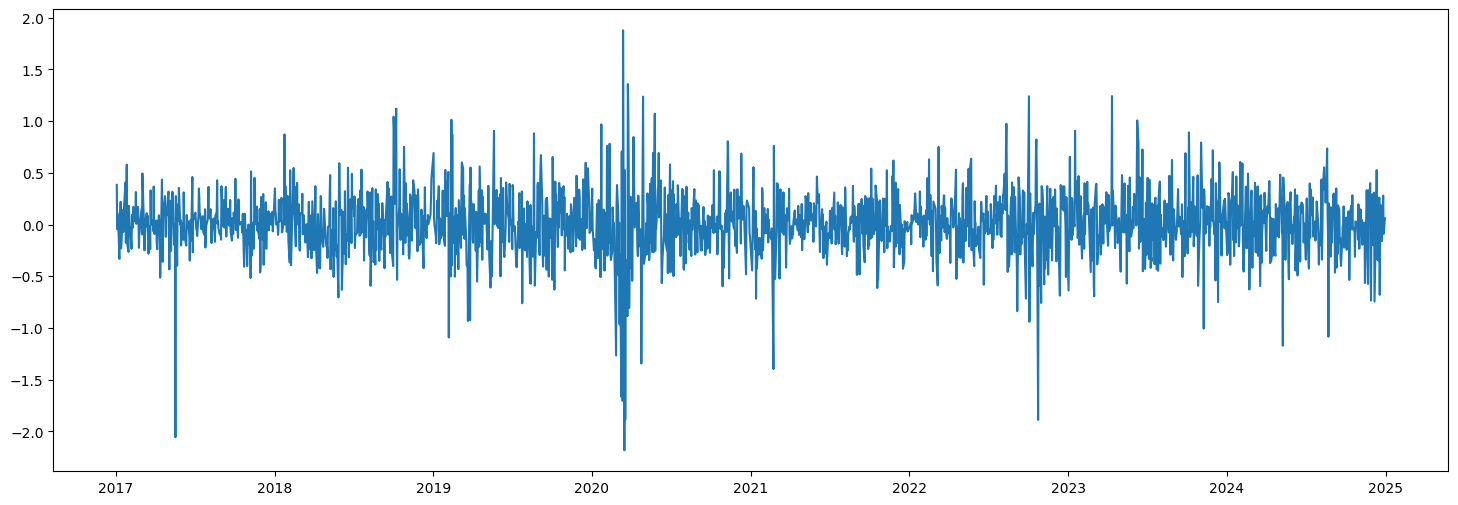

In [28]:
plt.plot(bb_series_diff)

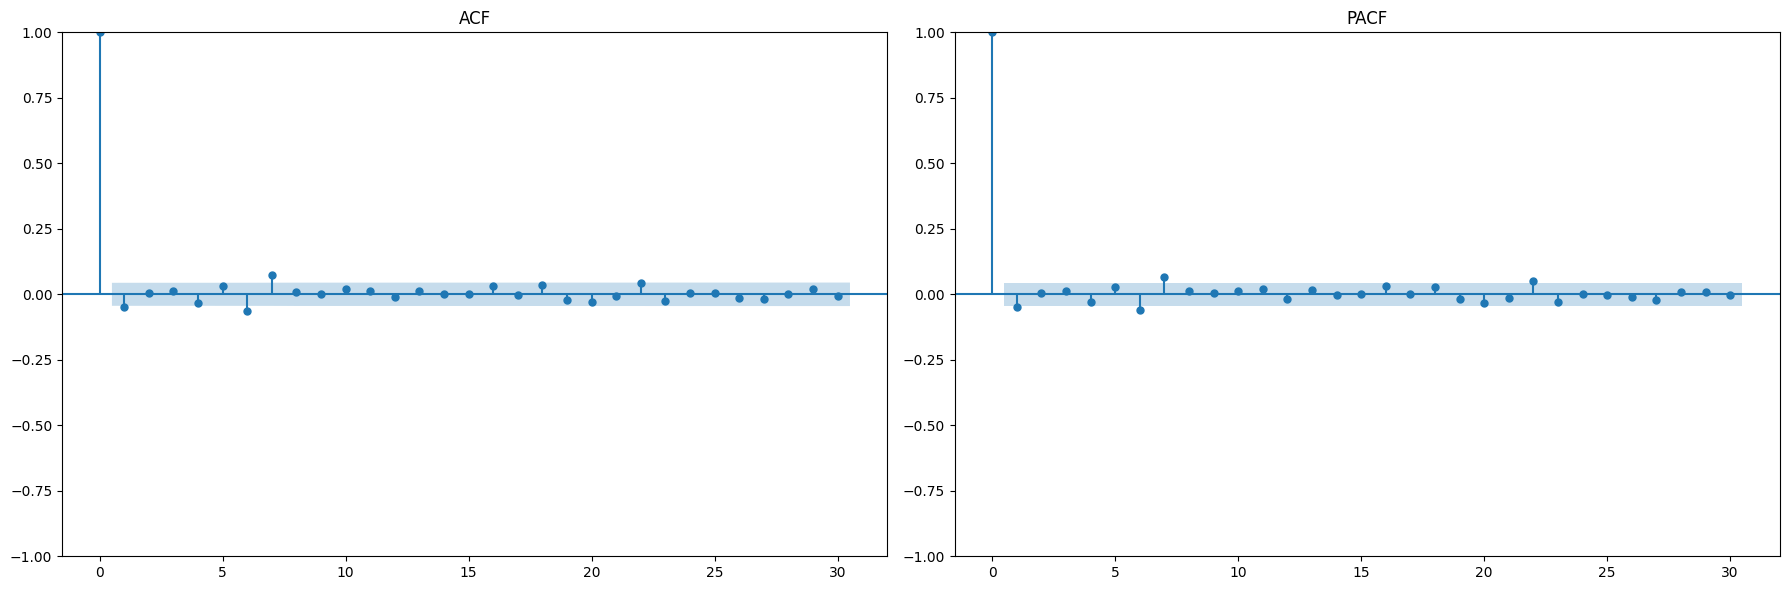

In [29]:
fig, axs = plt.subplots(1, 2)

plot_acf(bb_series_diff, lags=30, ax=axs[0])
axs[0].set_title("ACF")

plot_pacf(bb_series_diff, lags=30, ax=axs[1])
axs[1].set_title("PACF")

plt.tight_layout()
plt.show()